In [50]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [51]:
# Define the image size and batch size
image_size = (128, 128)
batch_size = 32

# ImageDataGenerator for training (with augmentation) and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True    # Flip the images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values for test set

# Load the train and test datasets
train_generator = train_datagen.flow_from_directory(
    r'C:/Users/jagan/OneDrive/Desktop/intership/Task31/test',  # Replace with actual path
    target_size=image_size,      # Resize images
    batch_size=batch_size,
    class_mode='binary'          # Binary classification (cats vs dogs)
)

test_generator = test_datagen.flow_from_directory(
    r'C:/Users/jagan/OneDrive/Desktop/intership/Task31/train',    # Replace with actual path
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 140 images belonging to 2 classes.
Found 557 images belonging to 2 classes.


In [52]:
# Initialize the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the results to feed into a fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))


In [53]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [54]:
steps_per_epoch = len(test_generator) // batch_size


In [56]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Adjust the number of epochs based on your needs
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)



Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 807ms/step - accuracy: 0.4456 - loss: 0.8416 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5938 - loss: 0.6478 - val_accuracy: 0.5385 - val_loss: 0.6816
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step - accuracy: 0.5553 - loss: 0.6843 - val_accuracy: 0.5037 - val_loss: 0.6919
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6819 - val_accuracy: 0.3077 - val_loss: 0.7025
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 795ms/step - accuracy: 0.4708 - loss: 0.6937 - val_accuracy: 0.5386 - val_loss: 0.6920


In [58]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.5271 - loss: 0.6920
Test Accuracy: 53.68%


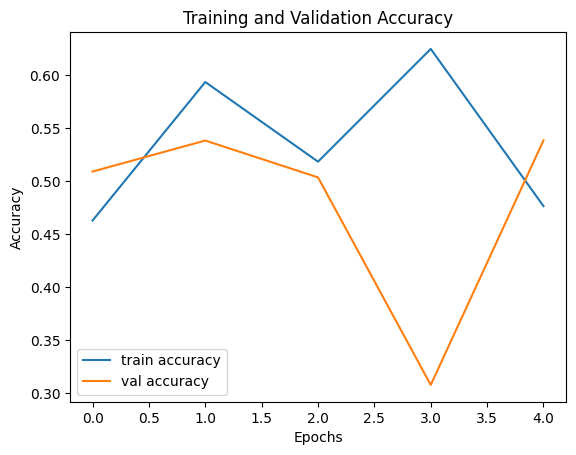

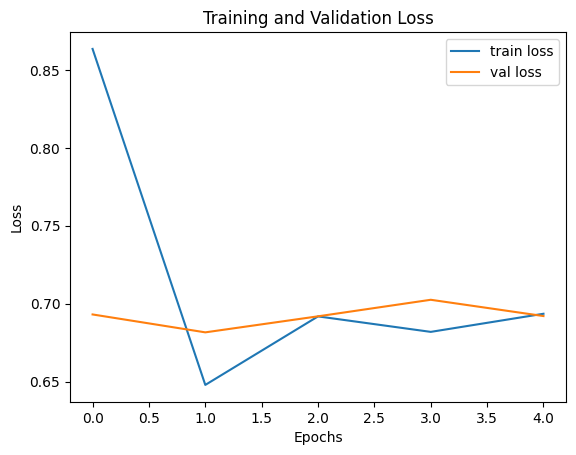

In [59]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
